# **<span style="color:deepskyblue">Time</span>**

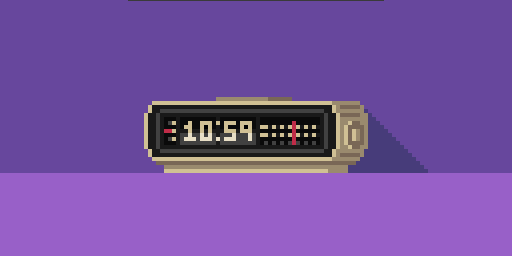


Pygame kann sich die vergangene Zeit zurück geben lassen, seit wann das Spiel gestartet wurde.\
Bzw. seit wann *pygame.init()* aufgerufen wurde.

Zusätzlich können eigene Timer definiert werden.

***

In [ ]:
# to get Time since we started the game -> result in Milliseconds 
# damit könnte man start countdowns erstellen

print(pygame.time.get_ticks())

***

## **<span style="color:deepskyblue">Display Score based on Time</span>**

In [ ]:
# Methoden Deklarationen

def display_score():
    score = f"Score: {pygame.time.get_ticks() // 1000}"                                             # 2. hier erst einmal ohne // 1000 zeigen
    score_surface = font_score.render(score, True, "White")
    score_rect = score_surface.get_rect(midtop = (120, WINDOW_HEIGHT - 60))
    display.blit(score_surface, score_rect)

# import text # # # # # # # # # # # # # # # # # # # 
font = pygame.font.Font("ressources/graphics/subatomic.ttf", 50)
font_score = pygame.font.Font(path+"fonts/subatomic.ttf", 30)                                       # 1. Font Score mit hinzufügen
title_surface = font.render("Space Boi", True, "White")
title_rect = title_surface.get_rect(midtop = (640, 150))

In [ ]:
# im GAME LOOP dann an dieser Stelle einfügen

# 2. Updates
display.fill((0, 0, 0))
display.blit(background_surface, (0, 0))
display.blit(ship_surface, ship_rectangle)
for laser in laser_list:
    display.blit(laser_surface, laser)

display_score()                                                                                     #  3. right there

***

## **<span style="color:deepskyblue">Shoot Timer | Cooldown </span>**

Eine Art Countdown, der runter gezählt wird, nachdem ein Laser ausgelöst wurde.\
Erst nach Ablauf des Countdowns kann ein neuer Laser ausgelöst werden.

Die Zeit muss dann hier zwei mal geprüft werden, weil Pygame dafür keine in Built Funktionen hat.


#### **If duration < current_time - start_time : time is over**


***

Vorbereitung im Game Loop

In [ ]:
# Laser Timer
can_fire = True
last_laser_time = None

# Im GAME LOOP
if event.type == pygame.JOYBUTTONDOWN and can_fire:                                                 # can_fire hier hinzufügen
    if pygame.joystick.Joystick(0).get_button(0) or pygame.joystick.Joystick(0).get_button(1):
        
        # Laser Logic
        laser_rectangle = laser_surface.get_rect(midbottom = (ship_rectangle.midtop))
        laser_list.append(laser_rectangle)
        
        # Laser Timer
        can_fire = False
        last_laser_time = pygame.time.get_ticks()

Erstellung einer Funktion für die Berechnung des Laser Cooldowns.

In [ ]:
def laser_cooldown(can_fire, duration= 500):
    if not can_fire: 
        current_time = pygame.time.get_ticks()
        if current_time - last_laser_time >= duration:
            can_fire = True

# Wird dann wegen Localer Variable can_fire nicht funktionieren, diese muss also returnt werden
    return can_fire

Update im Game Loop

In [ ]:
# Analog Stick
x_speed = round(pygame.joystick.Joystick(0).get_axis(0))
y_speed = round(pygame.joystick.Joystick(0).get_axis(1))
move(x_speed, y_speed)

# Laser Updates
laser_update(laser_list)
laser_cooldown(can_fire, 400)                                                   # wird dann so wegen der localen Variable nicht funktionieren
can_fire = laser_cooldown(can_fire, 400)                                        # muss daher angepasst werden
# drawings
display.fill((0, 0, 0))
display.blit(background_surface, (0, 0))
display.blit(ship_surface, ship_rectangle)
for laser in laser_list:
    display.blit(laser_surface, laser)

display_score()

***

<img src="../../db_assets/Muten Roshi.gif" style="height: 150px"/>